In [1]:

import sklearn
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt


In [2]:

## !pip install scikit-learn
## !pip install pandas
## !pip install matplotlib


In [3]:

def hex_tokenizer(text):
    return [ text[i:i+2] for i in range(0, len(text), 2)]


In [4]:



## Packet payloads

examples = ['a0328000bfdd',           ## Normal
            '8000dd00ff',             ## Normal
            'f4cc32ffaedf',           ## Normal
            'ccdf1280bf',             ## Normal
            '8042aebfa032',           ## Normal
            '64aa90df42',             ## -> Anomaly
            'df90421664aa'            ## -> Anomaly
]


In [5]:

vectorizer = CountVectorizer( tokenizer=hex_tokenizer, lowercase=False)

## vectorizer = CountVectorizer(min_df=1)   ##, stop_words='english')


In [6]:

## X   = vectorizer.fit_transform(corpus)

dtm = vectorizer.fit_transform(examples)


/Users/user/opt/anaconda3/envs/py38_Cyber_ML/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [7]:

print(  vectorizer.get_feature_names_out()  )


['00' '12' '16' '32' '42' '64' '80' '90' 'a0' 'aa' 'ae' 'bf' 'cc' 'dd'
 'df' 'f4' 'ff']


In [8]:

## print(  X.toarray()  )

print(  dtm.toarray()  )


[[1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0]
 [2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1]
 [0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0]]


In [9]:

dtm_pd = pd.DataFrame( dtm.toarray(), index=examples, columns=vectorizer.get_feature_names_out()  ).head(10)
dtm_pd


,00,12,16,32,42,64,80,90,a0,aa,ae,bf,cc,dd,df,f4,ff
a0328000bfdd,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
8000dd00ff,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
f4cc32ffaedf,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1
ccdf1280bf,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
8042aebfa032,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0
64aa90df42,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0
df90421664aa,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0



## SVD


In [10]:

lsa = TruncatedSVD(2)


In [11]:

dtm_lsa = lsa.fit_transform(  dtm  )


In [12]:

svd_dtm_pd = pd.DataFrame( dtm_lsa, index=examples, columns=["SVD1", "SV2"]  ).head(10)
svd_dtm_pd


,SVD1,SV2
a0328000bfdd,1.935926,-1.134140
8000dd00ff,1.525134,-1.208630
f4cc32ffaedf,1.312779,0.290966
ccdf1280bf,1.364542,0.103746
8042aebfa032,1.838913,-0.223623
64aa90df42,0.964505,1.865193
df90421664aa,1.033209,2.059243



## PLOT


In [13]:

xs = [ w[0] for w in dtm_lsa ]
ys = [ w[1] for w in dtm_lsa ]


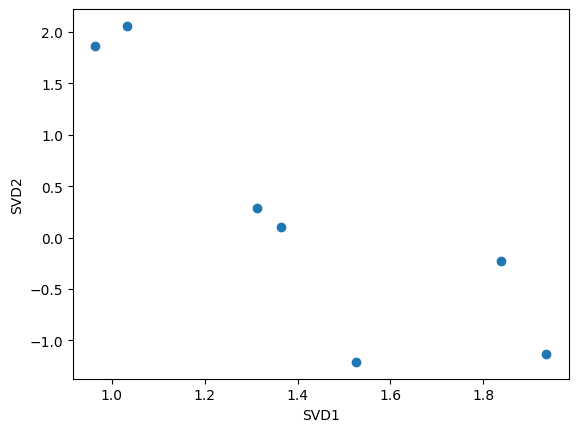

In [14]:

plt.scatter(xs, ys)
plt.xlabel("SVD1")
plt.ylabel("SVD2")
plt.show()


In [15]:

from sklearn.cluster import KMeans


In [16]:

km_lsa = KMeans(
       n_clusters=2,
       init='random',
       n_init=10,
       max_iter=300,
       ## to1=1e-04,
       random_state=0
)


In [17]:

y_lsa = km_lsa.fit_predict(dtm_lsa)


In [18]:

y_lsa.shape


(7,)

In [19]:

y_lsa


array([0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [20]:

X = dtm_lsa


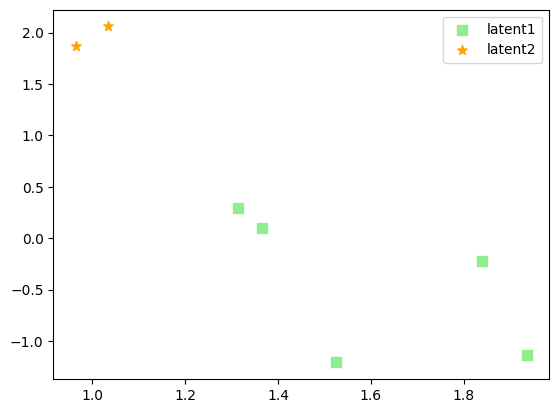

In [21]:

plt.scatter(
    X[ y_lsa==0 , 0],
    X[ y_lsa==0 , 1],
    s=50,
    c='lightgreen',
    marker='s',
    label='latent1'
)
plt.scatter(
    X[ y_lsa==1 , 0],
    X[ y_lsa==1 , 1],
    s=50,
    c='orange',
    marker='*',       ##o
    label='latent2'
)
plt.legend()
plt.show()
